In [75]:
import h5py
import matplotlib.pyplot as plt
import numpy
from matplotlib.pyplot import figure

from functional import *

In [76]:
# Set damping factor to get lifetime broadening
DAMP = 0.01

In [77]:
# Pass in binary file name and the path to which the data are stored in
def read_dataset(fname, path):
    f = h5py.File(fname)
    return np.array(f[path])

In [78]:
# Raw data from Chronus
time_c = read_dataset('water_classical_x_0p0001.bin', "RT/TIME")
ux_c = read_dataset('water_classical_x_0p0001.bin', "RT/LEN_ELEC_DIPOLE")[:,0]
uy_c = read_dataset('water_classical_y_0p0001.bin', "RT/LEN_ELEC_DIPOLE")[:,1]
uz_c = read_dataset('water_classical_z_0p0001.bin', "RT/LEN_ELEC_DIPOLE")[:,2]
dt_c = time_c[1] - time_c[0]
signals_c = [ux_c, uy_c, uz_c]

<ipython-input-77-7d4ed873fb7f>:3: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  f = h5py.File(fname)


In [79]:
# Raw data from Gaussian
x_data_g = np.genfromtxt("x_data_gaussian.txt", dtype=None)
y_data_g = np.genfromtxt("y_data_gaussian.txt", dtype=None)
z_data_g = np.genfromtxt("z_data_gaussian.txt", dtype=None)
time_g = x_data_g[1:, 0]
dt_g = time_g[1] - time_g[0]
ux_g = x_data_g[1:, 2] * 0.393456
uy_g = y_data_g[1:, 3] * 0.393456
uz_g = z_data_g[1:, 4] * 0.393456
signals_g = [ux_g, uy_g, uz_g]

In [80]:
# Fourier transformed spectra
spects_c = []
freq_c = None
for s in signals_c:
    s -= s[0]
    s *= np.exp(-DAMP*time_c)
    #w, f = fourier_tx(s, dt, 0)
    w, f = pade_tx(s, dt_c, (0,5))
    freq_c = w
    spects_c.append(f)

In [81]:
# Fourier transformed spectra
spects_g = []
freq_g = None
for s in signals_g:
    s -= s[0]
    s *= np.exp(-DAMP*time_g)
    #w, f = fourier_tx(s, dt, 0)
    w, f = pade_tx(s, dt_g, (0,5))
    freq_g = w
    spects_g.append(f)

In [82]:
total_c = sum([f.imag for f in spects_c]) / 3
total_c *= -freq_c

total_g = sum([f.imag for f in spects_g]) / 3
total_g *= -freq_g

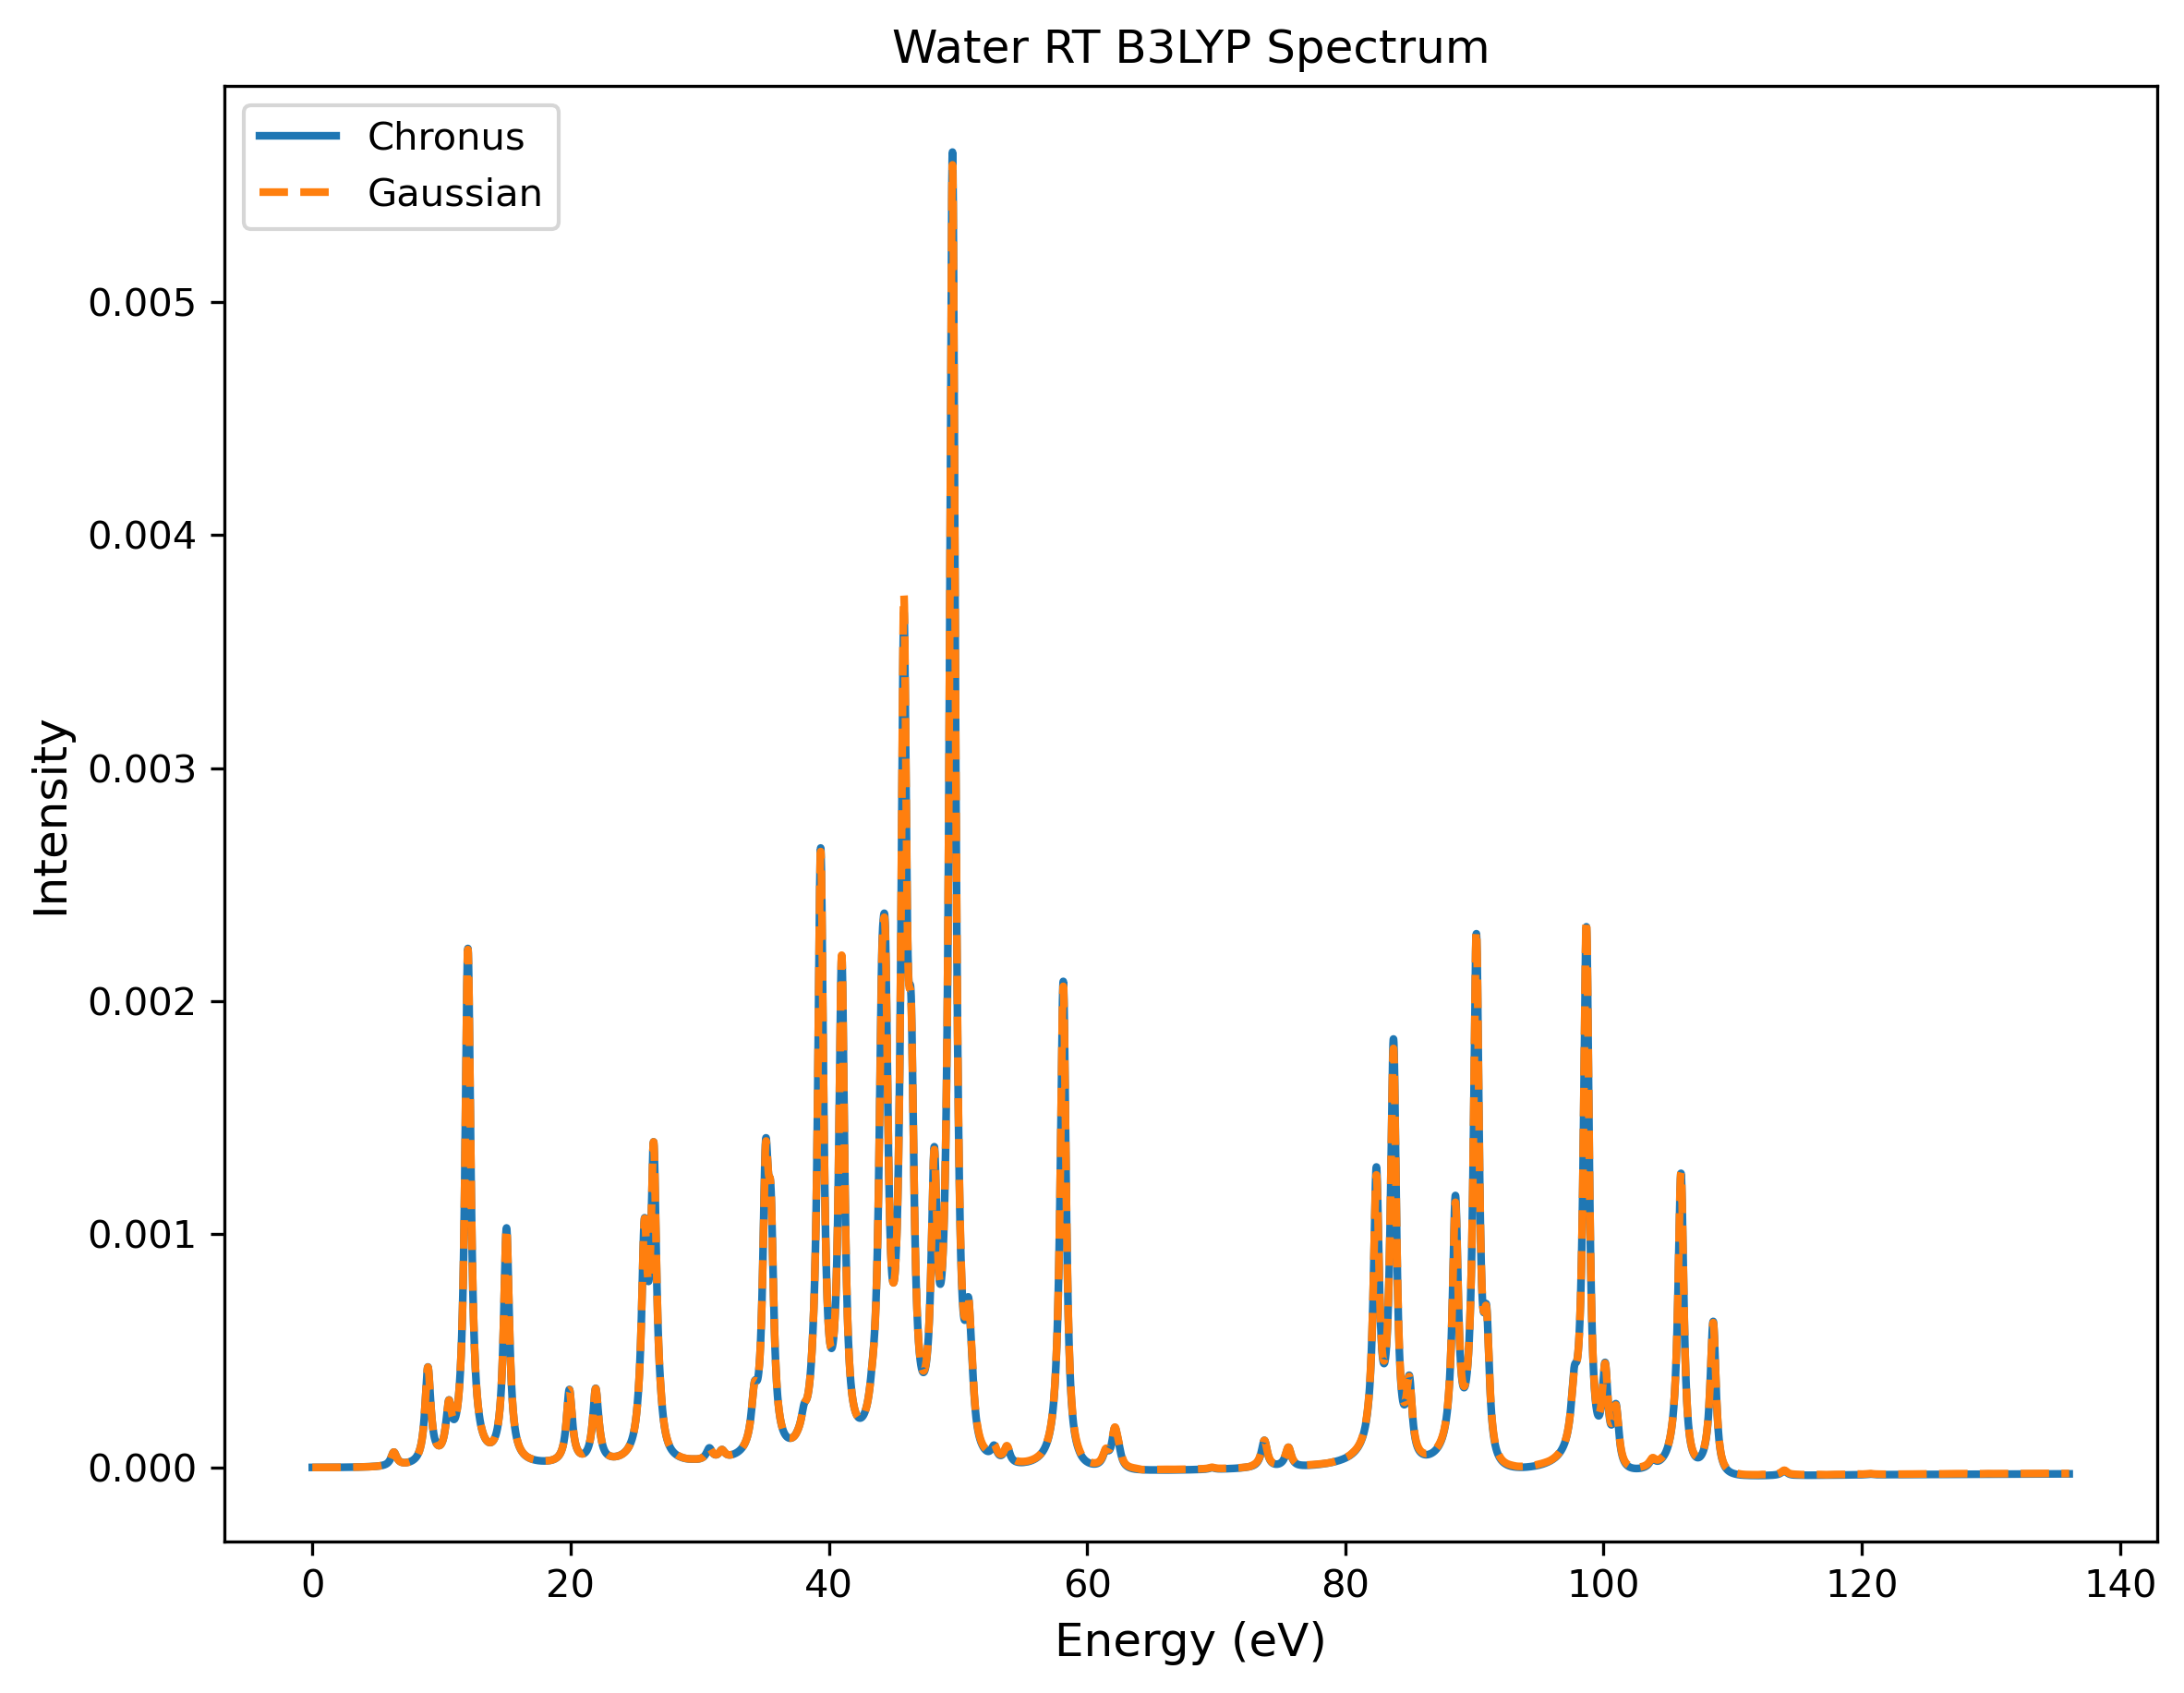

In [83]:
# Plotting
figure(figsize = (8, 6), dpi=300)
plt.plot(freq_c*27.2114, total_c, ls="-", linewidth = 2, label = "Chronus")
plt.plot(freq_g*27.2114, total_g, ls="--", linewidth = 2, label = "Gaussian")

#plt.ylim(0,0.175)
plt.ylabel("Intensity", fontsize=12)
plt.xlabel("Energy (eV)", fontsize=12)
plt.tight_layout()
plt.title("Water RT B3LYP Spectrum")
plt.legend(loc='upper left')
#plt.savefig("water_fourier_thin.pdf")
plt.show()